### Imports

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from data import *
from evaluation import *
%matplotlib inline

### Read data and display

In [2]:
df = pd.read_parquet('../lastfm-dataset-1k.snappy.parquet')

In [3]:
df = df.dropna()

In [4]:
print(f'Number of Records: {len(df):,}\nUnique Users: {df.user_id.nunique()}')
df

Number of Records: 16,936,134
Unique Users: 992


,user_id,timestamp,artist_id,artist_name,track_id,track_name
0,user_000001,2006-08-13 13:59:20+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,c4633ab1-e715-477f-8685-afa5f2058e42,The Launching Of Big Face
1,user_000001,2006-08-13 14:03:29+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,bc2765af-208c-44c5-b3b0-cf597a646660,Zn Zero
2,user_000001,2006-08-13 14:10:43+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,aa9c5a80-5cbe-42aa-a966-eb3cfa37d832,The Return Of Super Barrio - End Credits
3,user_000001,2006-08-13 14:17:40+00:00,67fb65b5-6589-47f0-9371-8a40eb268dfb,Tommy Guerrero,d9b1c1da-7e47-4f97-a135-77260f2f559d,Mission Flats
4,user_000001,2006-08-13 14:19:06+00:00,1cfbc7d1-299c-46e6-ba4c-1facb84ba435,Artful Dodger,120bb01c-03e4-465f-94a0-dce5e9fac711,What You Gonna Do?
...,...,...,...,...,...,...
19098848,user_001000,2009-05-04 00:29:53+00:00,fc7376fe-1a6f-4414-b4a7-83f50ed59c92,Flying Lotus,7cf60b11-fd28-4464-8882-038d9e818340,Melt!
19098849,user_001000,2009-05-04 00:31:39+00:00,fc7376fe-1a6f-4414-b4a7-83f50ed59c92,Flying Lotus,27f672f1-2dac-455b-8841-19e950d6f737,Comet Course
19098850,user_001000,2009-05-04 00:34:40+00:00,fc7376fe-1a6f-4414-b4a7-83f50ed59c92,Flying Lotus,1b2053e7-fb9e-4b7e-8ec8-548d4f42cafe,Orbit 405
19098851,user_001000,2009-05-04 09:00:33+00:00,acd902c5-91df-4e1f-8dd6-7c4a348a4cb9,Anathallo,9722b7e6-aad2-4175-a449-e32b595917bc,At The Lowest Point


### Filter data

In [5]:
Number_of_users = 100
History_size = 500

userIds = []
trackIds = []

for userId in df.user_id.unique()[:Number_of_users]:


    userHistory = df[ (df["user_id"] == userId) ][:History_size]
    range_i = userHistory.index.values.tolist()

    for i in range_i:

        userIds.append(userHistory.user_id[i])
        trackIds.append(userHistory.track_id[i])


df_light = pd.DataFrame(columns = ["user_id", "track_id"])

rows = pd.DataFrame({ "user_id":userIds, "track_id":trackIds })
df_light = pd.concat([df_light,rows],axis=0)

In [6]:
print(f'Number of Records: {len(df_light):,}\nUnique Users: {df_light.user_id.nunique()}')
df_light.head(20)

Number of Records: 48,614
Unique Users: 100


,user_id,track_id
0,user_000001,c4633ab1-e715-477f-8685-afa5f2058e42
1,user_000001,bc2765af-208c-44c5-b3b0-cf597a646660
2,user_000001,aa9c5a80-5cbe-42aa-a966-eb3cfa37d832
3,user_000001,d9b1c1da-7e47-4f97-a135-77260f2f559d
4,user_000001,120bb01c-03e4-465f-94a0-dce5e9fac711
5,user_000001,777ac51f-8ffc-4c44-92b6-a2c75cbc6915
6,user_000001,328913b8-f31f-4abf-976e-7641174f680b
7,user_000001,8e81302a-6cde-4818-8703-43b5356ce0a0
8,user_000001,1c0377bb-c00b-4bbe-b4b2-615f13324adc
9,user_000001,8f916d23-0510-4ad5-9a7f-8a076c3f14ca


### Transform data into adaptated DataFrame

In [27]:
new_df = pd.DataFrame(columns = ["user_id",	"track_id",	"count",])

userIdCounter=0

userIds = []
trackIds = []
trackCounts = []

for userId in df_light.user_id.unique():
    trackIdCounter=0

    for trackId in df_light[df_light["user_id"] == userId].track_id.unique():
        count = df_light[ (df_light['track_id'] == trackId) & (df_light["user_id"] == userId) ].count()
        
        userIds.append(userIdCounter)
        trackIds.append(trackIdCounter)
        trackCounts.append(count.track_id)

        trackIdCounter+=1

    if userIdCounter%10==0 : print(userIdCounter,"%")
    userIdCounter+=1

row = pd.DataFrame({ "user_id":userIds,	"track_id":trackIds, "count":trackCounts})
new_df = pd.concat([new_df,row],axis=0)

0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %


In [28]:
new_df

,user_id,track_id,count
0,0,0,2
1,0,1,2
2,0,2,3
3,0,3,1
4,0,4,2
...,...,...,...
30449,99,336,1
30450,99,337,1
30451,99,338,1
30452,99,339,1


### Download Data
#### Standardize id: new id starts from 0 and increments by 1, output format: (user, item, rating)

In [9]:
N = len(new_df.user_id.unique())
M = len(new_df.track_id.unique())

print('number of users: %d \nnumber of unique tracks: %d \ntotal number of tracks: %d' %(N,M,new_df['count'].sum()))

number of users: 100 
number of unique tracks: 481 
total number of tracks: 48614


### Split Dataset

In [10]:
train_list, test_list = train_test_split(new_df,test_size=0.2)
print ('train length: %d \ntest length: %d' %(len(train_list),len(test_list)))

train length: 24363 
test length: 6091


### Convert data to matrix format

In [66]:
train_mat = sequence2mat(sequence = train_list, N = N, M = M)
test_mat = sequence2mat(sequence = test_list, N = N, M = M)

train_mat

array([[2., 2., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 5., 2., ..., 0., 0., 0.],
       ...,
       [2., 1., 2., ..., 0., 0., 0.],
       [4., 6., 4., ..., 0., 0., 0.],
       [2., 3., 3., ..., 0., 0., 0.]])

### Calculate similarity

In [12]:
# Calculate the similarity between a and b
def calculate_similarity(a, b, model='pearson', minimum_common_items=5):
    assert a.shape==b.shape
    dim = len(a.shape) # Vector dimension
    common_items = a*b>0 # Commonly rated items
    common_size = np.sum(common_items,axis=dim-1)
    
    if model=='pearson':
        mean_a = np.sum(a,axis=dim-1)/np.sum(a>0,axis=dim-1)
        mean_b = np.sum(b,axis=dim-1)/np.sum(b>0,axis=dim-1)
        if dim ==1: # If two column vectors
            aa = (a - mean_a)*common_items
            bb = (b - mean_b)*common_items
        else:
            aa = (a - np.reshape(mean_a, (-1,1)))*common_items
            bb = (b - np.reshape(mean_b, (-1,1)))*common_items
    else: # Consine
        mean_u = np.sum(b,axis=0)/np.sum(b>0,axis=0)
        aa = (a - mean_u)*common_items
        bb = (b - mean_u)*common_items
        
    sim = np.sum(aa*bb, axis=dim-1)/(np.sqrt(np.sum(aa**2, axis=dim-1))*np.sqrt(np.sum(bb**2, axis=dim-1)) + 1e-10)
    least_common_items = common_size>minimum_common_items # Products with a common rating of at least least_common_items
    return sim*least_common_items


# Calculate similarity
def similarity_matrix(mat, model='pearson', minimum_common_items=5):
    n,m = mat.shape
    sim_list=[]
    for u in range(n):
        a = np.tile(mat[u,:], (n,1))
        b = mat
        if model=='pearson':
            sim = calculate_similarity(a, b, model='pearson', minimum_common_items=minimum_common_items)
        else: # consine
            sim = calculate_similarity(a, b, model='consine', minimum_common_items=minimum_common_items)
        sim_list.append(sim)
        if u % 100 ==0:
            print(u)
    return np.array(sim_list) 

In [13]:
sim_mat = similarity_matrix(mat=train_mat, model='pearson')
neighbors = np.argsort(-np.array(sim_mat)) # Get neighbors
sim_sort = -1*np.sort(-np.array(sim_mat)) # Get the similarity of the corresponding neighbors

0


In [14]:
np.set_printoptions(precision=4, suppress=True)
print('user 0:')
print('neighbors:') # Neighbors of user 0
print(neighbors[0,:20])
print('sim:\n') # Neighbor similarity of user 0
print(sim_sort[0,:10])
print('similarity_mat:') # Similarity matrix between users
print(sim_mat[:6,:6])

user 0:
neighbors:
[ 0  3 35  7 97  4 59  1 74 56  2  5 31 90 40 96 37 17 50 77]
sim:

[1.     0.3457 0.3204 0.3009 0.2369 0.19   0.1441 0.1131 0.113  0.0914]
similarity_mat:
[[ 1.      0.1131  0.083   0.3457  0.19    0.0776]
 [ 0.1131  1.      0.1201  0.0156  0.0729  0.1248]
 [ 0.083   0.1201  1.     -0.0927 -0.0459  0.0539]
 [ 0.3457  0.0156 -0.0927  1.      0.0857  0.0519]
 [ 0.19    0.0729 -0.0459  0.0857  1.      0.0821]
 [ 0.0776  0.1248  0.0539  0.0519  0.0821  1.    ]]


### The value of the nearest neighbor K
Experience value: general 10-50

In [15]:
def get_K(sim_mat, min_similarity=0.5):
    num = np.sum(sim_mat[:,1:]>min_similarity, axis=1) # Statistical users greater than min_similarity of ratings
    
    # Drawing 
    plt.rcParams['font.sans-serif'] = [u'SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.hist(num, bins=40, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel(u"Distribtion")
    plt.ylabel(u"Users")
    plt.title(u"Distribtion per user for minimal similary = 0.05")
    plt.show()
    
    num_sort = np.sort(-num)
    line = int(0.8*len(sim_mat))
    K = -1*num_sort[line]
    return K

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


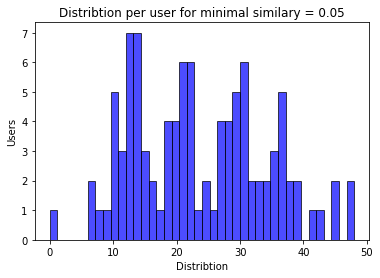

In [16]:
min_similarity=0.1
K = get_K(sim_mat, min_similarity=min_similarity)

### Predict ratings for user-unknown items

In [17]:
def prediction(train_mat, sim_mat, K=1, model='user_based'):
    assert len(train_mat.shape)>1
    n,m = train_mat.shape
    
    if  model=='user_based':
        sim_sort = -1*np.sort(-np.array(sim_mat))[:,1:K+1] # Remove the closest self
        neighbors = np.argsort(-np.array(sim_mat))[:,1:K+1]
        common_items = train_mat[neighbors]>0
        mean_user = np.reshape(np.sum(train_mat,axis=1)/np.sum(train_mat>0,axis=1), (-1,1))
        mat_m = train_mat - mean_user
        aa = np.sum(sim_sort[:,:,np.newaxis]*mat_m[neighbors]*common_items,axis=1)
        bb = np.sum(sim_sort[:,:,np.newaxis]*common_items,axis=1)+1e-10 # Make sure the denominator is not 0
        r_pred = mean_user + aa/bb
        return r_pred
    else: # 'item_based'
        r_pred=[]
        for u in range(n):
            u_mat = np.tile(train_mat[u],(m,1)) # m records d of user u, m*m
            rated_items_sim = (u_mat>0)*sim_mat # Preserve similarity with scored records m*m
            sim_sort = -1*np.sort(-np.array(rated_items_sim))[:,:K] # m*K
            neighbors = np.argsort(-np.array(rated_items_sim))[:,:K] # m*K
            neighbor_ratings = np.array([u_mat[i,neighbors[i]] for i in range(m)])# m*K
            aa = np.sum(sim_sort*neighbor_ratings,axis=1) # m*1
            bb = np.sum(sim_sort,axis=1)+1e-10 # 1e-10 Make sure the denominator is not 0 m*1
            r_pred.append(aa/bb)
        
        return np.array(r_pred)    

In [18]:
r_pred = prediction(train_mat=train_mat, sim_mat=sim_mat, K=K, model='user_based')

### Sort the products according to the predicted value and get the top-n list

In [76]:
n = 50
topn = get_topn(r_pred=r_pred, train_mat=train_mat, n=n)
print('user 0:')
print('top-n list:',topn[0])

user 0:
top-n list: [144 143   5   3 214 149  34  23  49 329 343  57 383 351 236  33  12 314
  72 124 332  92 284 142  32 410 411 412  87 345 342 339 275 243 209 273
 303 242 212 267 389 159  61 279 413 414 415 428 429 430]


In [102]:
def recRep(basket, target):
  print(target)
  print(basket)
  if len(target) == 0:
    return 0
  res = 0
  for track in basket:
    if track[0] in target:
      res += 1
  return res/len(target)

In [103]:
t_rep = {}
t_exp = {}

for i,topn_user in enumerate():
    t_rep[i] = []
    t_exp[i] = []

    for track_index in topn_user:
        if test_mat[i][track_index] > 1:
            t_rep[i].append(track_index)
        elif test_mat[i][track_index] == 1:
            t_exp[i].append(track_index)

for i_user in range(len(test_mat)):
    print(recRep(topn[i_user],t_rep[i_user]))

[214, 149, 34, 236, 33, 124, 32, 159]
[144 143   5   3 214 149  34  23  49 329 343  57 383 351 236  33  12 314
  72 124 332  92 284 142  32 410 411 412  87 345 342 339 275 243 209 273
 303 242 212 267 389 159  61 279 413 414 415 428 429 430]


IndexError: invalid index to scalar variable.

### Evaluate Model (Metrics)

In [22]:
from sklearn.metrics import ndcg_score

mae, rmse = mae_rmse(r_pred=r_pred, test_mat=test_mat)
print('Mae : %.4f\nRmse : %.4f'%(mae,rmse))

recall, precision = recall_precision(topn=topn, test_mat=test_mat)
print('Recall : %.4f\nPrecision : %.4f'%(recall,precision))

print("NDCG : ",ndcg_score(test_mat, r_pred))

Mae : 0.8137
Rmse : 1.6162
Recall : 0.3249
Precision : 0.3958
NDCG :  0.47453838947561294


In [48]:
def precision(query_relevancy_labels, k):
    sum = 0
    for i in range(min(k,len(query_relevancy_labels))):
        sum += query_relevancy_labels[i]
    return sum/k

def recall(query_relevancy_labels, k):
    num = k*precision(query_relevancy_labels, k)
    den = 0
    for i in query_relevancy_labels:
        den += i
    if den == 0:
        return 0
    else:
        return num/den

In [72]:
print(shape(train_mat),shape(r_pred))

(100, 481) (100, 481)


In [71]:
# repeat_explore_mat = np.zeros(shape(test_mat))

# # we fill repeat matrix with tracks which was used in both testing and training
# # when its 0 its not used in both, otherwise it is
# for i in range(len(test_mat)):
#     for j in range(len(test_mat[i])):
#         if test_mat[i][j]==0:
#             repeat_explore_mat[i][j] = 0
#         elif test_mat[i][j]==1:
#             repeat_explore_mat[i][j] = 1

repeat_recalls = []
explore_recalls = []

# we calculate repeat and explore recall
for i in range(len(test_mat)):
    repeatRelevance = []
    exploreRelevance = []

    for j in range(len(test_mat[i])):
        # repeat
        if test_mat[i][j] >1 :
            if test_mat[i][j] == r_pred[i][j]:
                repeatRelevance.append(1)
            else:
                repeatRelevance.append(0)
        # explore
        elif test_mat[i][j] == 1:
            if test_mat[i][j] == r_pred[i][j]:
                exploreRelevance.append(1)
            else:
                exploreRelevance.append(0)
    # repeat
    if(len(repeatRelevance)!=0):
        repeat_recalls.append(recall(repeatRelevance, len(repeatRelevance)))
    # explore
    if(len(exploreRelevance)!=0):
        explore_recalls.append(recall(exploreRelevance, len(exploreRelevance)))

print("Repeat recall : ",np.array(repeat_recalls).mean())
print("Explore recall : ", np.array(explore_recalls).mean())

Repeat recall :  0.0
Explore recall :  0.010101010101010102
